## Python statistics essential training - 05_06_bayesian

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [6]:
import pymc3 as pm

In [7]:
n = 100
k = 61

with pm.Model() as coin_context:
    p = pm.Uniform('p',0.40,0.80)
    
    y = pm.Binomial('y',n=n,p=p,observed=k)
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:52<00:00, 400.70draws/s]


In [8]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p,0.60803,0.047798,0.000511,0.515791,0.701473,7942.891679,0.999951


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001ED439CF60>,
      dtype=object)

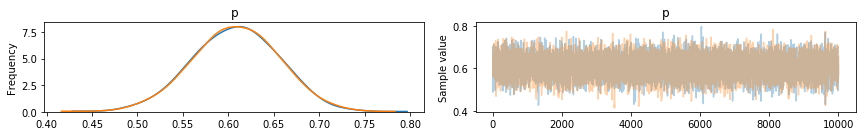

In [9]:
pm.traceplot(trace)

In [10]:
gdata=pd.read_csv('gapminder.csv').query('year == 1985')

In [11]:
gdata.sort_values('age5_surviving',inplace=True)

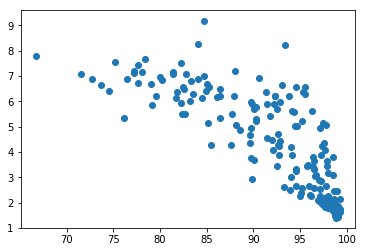

In [12]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

In [13]:
with pm.Model() as gapminder_context:
    intercept = pm.Uniform('intercept',5,15)
    slope = pm.Uniform('slope',-1,1)
    
    babies = pm.Normal('babies',
                       mu = intercept + slope * (gdata['age5_surviving'] - 65),
                       sd = 1,
                       observed = gdata['babies_per_woman'])
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [slope, intercept]
Sampling 2 chains:  26%|██▋       | 5517/21000 [10:47<36:03,  7.16draws/s]  
The number of effective samples is smaller than 25% for some parameters.


In [14]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
intercept,10.172661,0.276521,0.008214,9.601818,10.689519,999.533473,1.003672
slope,-0.218427,0.010054,0.000302,-0.237262,-0.198021,983.719064,1.003864


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001ED6D7AA58>,
      dtype=object)

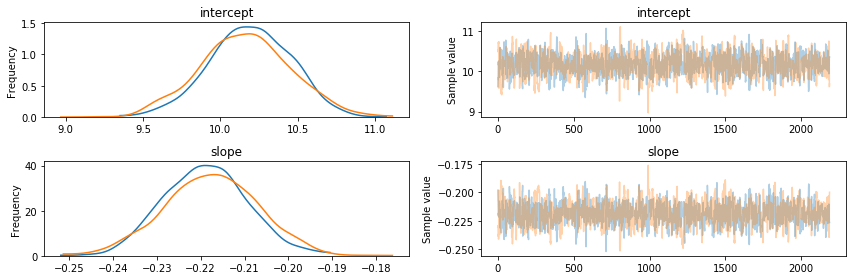

In [15]:
pm.traceplot(trace)

In [16]:
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving'] - 65)

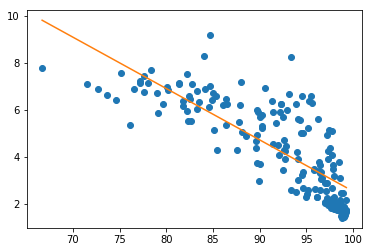

In [17]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])
pp.plot(gdata['age5_surviving'],babies,'C1')

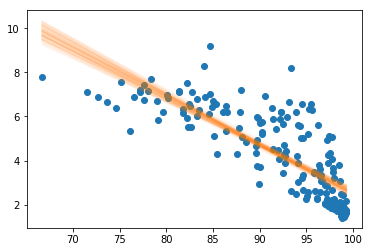

In [18]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

for i, intercept, slope in zip(range(100),trace['intercept'][::50],trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving'] - 65)
    pp.plot(gdata['age5_surviving'],babies,'C1',alpha=0.05)